# Mallas 

<img src="https://github.com/ccdonoso/Intro2_Computational_Mechanics/blob/master/img/logo_usach_dimec.png?raw=true" alt="logo" width="300"/>

- Autor: Claudio Canales Donoso
- Página: [ccdonoso.github.io](https://ccdonoso.github.io/)
- Cursos: Mecánica Computacional - Diseño Computarizado
- Universidad de Santiago de Chile
- Fecha: 05/03/24

License: BSD 3 clause

**Contenido** 
- Definición de malla.
- Atributos de malla o Campos.
- Celdas según VTK o Elementos según FEM.
- Mallas no-estructuradas en Pyvista



## ¿ Qué es una malla ?

Aunque la estructura de datos real utilizada para almacenar la malla en memoria depende del tipo de conjunto de datos, algunas abstracciones son comunes a todos los tipos. En general, una malla está formada por **vértices (puntos)** y **celdas (elementos, zonas)**. Los **elementos** se utilizan para discretizar una región y pueden tener varios tipos, como tetraedros, hexaedros, etc. Cada **elemento** contiene un conjunto de vértices. El mapeo de las **celdas(elementos)** a los vértices se denomina **conectividad de malla**. Tenga en cuenta que, aunque es posible definir sets de datos como caras y aristas, VTK no los representa explícitamente. Más bien, están implícitos en el tipo de **celda o elemento** y en su conectividad. Una excepción a esta regla es el **poliedro arbitrario**, que almacena explícitamente sus caras. La Ilustración 1, es un ejemplo de malla que consta de dos **elementos cuadrilateros**. La primera celda está definida por los vértices $(0,1,3,4)$ , y la segunda por los vértices $(1,2,4,5)$. Estas celdas son vecinas porque comparten la arista definida por los puntos.

Una malla está totalmente definida por su **topología** y las **coordenadas espaciales de sus vértices**. En VTK (Visualization Toolkit, herramienta que utiliza PyVista), las coordenadas de los puntos pueden estar implícitas, o pueden estar definidas explícitamente por una matriz de datos de dimensiones $(n_{puntos}\times 3 )$.

<img src="img/celdas.png" alt="logo" width="600"/>

<h4 align="center">
     Ilustración 1: Ejemplo de Malla.
</h4>

## Atributos de malla o campos
Un atributo (o una matriz de datos o campo) define los valores discretos de un campo sobre la malla. Algunos ejemplos de atributos son la **presión**, la **temperatura**, la **velocidad** y el tensor de **tensión**. Tenga en cuenta que PyVista(VTK) no define específicamente diferentes tipos de atributos. Todos los atributos se almacenan como matrices de datos, que pueden tener un número arbitrario de componentes. Los atributos pueden estar asociados a **puntos** o **celdas**. También es posible tener atributos que no estén asociados a ninguno de ellos. La Ilustración 2, muestra el uso de un atributo centrado en un punto. Obsérvese que el atributo sólo se define en los vértices. La interpolación se utiliza para obtener los valores en todos los demás lugares. Las funciones de interpolación utilizadas **dependen del tipo de celda**. En la documentación de VTK hay más detalles.

<img src="img/Cells_with_values.png" alt="logo" width="600"/>
<h4 align="center">
     Ilustración 2: Campo definido por las funciones de interpolación de un elemento.
</h4>

## Celdas o Elementos

Existen diferentes tipos de Celdas o Elementos, en la librería VTK (Librería base de PyVista), estos elementos se definen según el **orden de interpolación** y según la **cantidad de nodos**.

Recapitulando, una malla esta compuesta por:

- **Nodos**
- **Elementos**

Los elementos, conectan los nodos con diferentes geometrias primitivas. A continuación se presenta en la ilustación 2, los elementos de **primer orden de interpolación** y en la ilustración 3, los **elementos de segundo orden de interpolación**.

<img src="img/TestLinearCellDemo.png" alt="logo" width="800"/>

<h4 align="center">
     Ilustración 3: Elementos de Primer Orden.
</h4>

<img src="img/second_order_cells.png" alt="logo" width="800"/>

<h4 align="center">
     Ilustración 4: Elementos de Segundo Orden.
</h4>


## Malla no-estructurada

Una malla no estructurada, como la de la Ilustración 5, es el tipo de conjunto de datos primitivo más general. Almacena explícitamente la topología y las coordenadas de los puntos. Aunque VTK utiliza una estructura de datos de memoria eficiente para almacenar la topología, una malla no estructurada utiliza mucha más memoria para representar su malla. Por lo tanto, utilice una malla no estructurada sólo cuando no pueda representar su conjunto de datos como uno de los conjuntos de datos anteriores. VTK admite un gran número de tipos de celdas, todas las cuales pueden existir (de forma heterogénea) dentro de una malla no estructurada. La lista completa de todos los tipos de celdas soportados por VTK se encuentra en el archivo `vtkCellType.h` del código fuente de VTK, estos tipos de celda se presentaron en las **ilustraciones 3 y 4**.

<img src="img/unstructured.gif" alt="logo" width="600"/>
<h4 align="center">
     Ilustración 5: Malla no-estructurada
</h4>

## Mallas - no estructuradas en PyVista

1. Crearemos una malla estructurada de dos elementos cuadilateros `(VTK_QUAD)`, al igual que la ilustración 1.

<img src="img/celdas.png" alt="logo" width="400"/>

<h4 align="center">
     Ilustración 1: Ejemplo de Malla.
</h4>


In [4]:
# Importar librerias NumPy, PyVista y vtk
import numpy as np
import pyvista as pv
import vtk

In [5]:
# Crearemos los nodos (0,1,2,3,4,5)

nodes = np.array([[0., 0., 0.],
                  [0., 1., 0.],
                  [0., 2., 0.],
                  [1., 0., 0.],
                  [1., 1., 0.],
                  [1., 2., 0.]])

# Elementos
cells = np.array([[ 4, 0,  1,  4,  3],
                  [ 4,  1,  2,  5,  4]]).ravel()

# Conectividad de la malla, notar que .ravel() convierte la matriz en un vector.

num_cells = 2

celltypes = np.empty(2, dtype=np.uint8) #Array tamaño(n_elementos o celdas), valores (Tipo de elemento)
celltypes[:] = vtk.VTK_QUAD  #También es posible colocar el entero asociado a ese elemento (Ver las ilustraciones)

# Tipo de elementos de las celdas.

print(celltypes)

[9 9]


**Con la información de la malla, es necesario definir una malla no estructurada en PyVista.**


In [6]:
mesh = pv.UnstructuredGrid(cells,celltypes,nodes)
mesh.plot(show_edges=True,background="white",cpos="yx")

Widget(value='<iframe src="http://localhost:34791/index.html?ui=P_0x7fe004397dc0_0&reconnect=auto" class="pyvi…

In [7]:
mesh

UnstructuredGrid,Information
N Cells,2
N Points,6
X Bounds,"0.000e+00, 1.000e+00"
Y Bounds,"0.000e+00, 2.000e+00"
Z Bounds,"0.000e+00, 0.000e+00"
N Arrays,0


**Campo de temperatura.**

Aplicaremos el campo de temperatura de la figura 2.

<img src="img/Cells_with_values.png" alt="logo" width="400"/>
<h4 align="center">
     Ilustración 2: Campo definido por las funciones de interpolación de un elemento.
</h4>

In [8]:
mesh["Temperatura"] = np.array([260,147.96,57.3,31.18,5.89,19.12])
mesh.plot(show_edges=True,cpos="yx")

Widget(value='<iframe src="http://localhost:34791/index.html?ui=P_0x7fe004397c40_1&reconnect=auto" class="pyvi…

**Crearemos una malla mixta.**
Crearemos una malla no-estructurada de 1 elemento `(VTK_QUAD)`,  y 2 elementos triangulares `(VTK_TRIANGLE)`,al igual que la ilustración 7.

<img src="img/celdas2.png" alt="logo" width="500"/>

<h4 align="center">
     Ilustración 7: Malla de elementos mixtos.
</h4>

In [9]:
# Crearemos los nodos (0,1,2,3,4,5)
nodes = np.array([[0., 0., 0.],
                  [0., 1., 0.],
                  [0., 2., 0.],
                  [1., 0., 0.],
                  [1., 1., 0.],
                  [1., 2., 0.]])

# Elementos
cells = np.array([ 4, 0,  1,  4,  3, 3,  1,  5,  4, 3,  1,  2,  5])

num_cells = 3 # Tres elementos ( 1 Quad 2 Tri)

celltypes = np.array([9,5,5],dtype=np.uint8)  #También es posible colocar el entero asociado a ese elemento (Ver las ilustraciones)

In [10]:
#Ploteamos la malla
mesh = pv.UnstructuredGrid(cells,celltypes,nodes)
mesh.plot(show_edges=True,background="white",cpos="yx")

Widget(value='<iframe src="http://localhost:34791/index.html?ui=P_0x7fdff41b0ac0_2&reconnect=auto" class="pyvi…

In [11]:
mesh["Temperatura"] = np.array([260,147.96,57.3,31.18,5.89,19.12])
mesh.plot(show_edges=True,cpos="yx")

Widget(value='<iframe src="http://localhost:34791/index.html?ui=P_0x7fdffc9d8520_3&reconnect=auto" class="pyvi…

In [12]:
print(type(mesh))
mesh

<class 'pyvista.core.pointset.UnstructuredGrid'>


UnstructuredGrid (0x7fdff4103280)
  N Cells:    3
  N Points:   6
  X Bounds:   0.000e+00, 1.000e+00
  Y Bounds:   0.000e+00, 2.000e+00
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   1

## Opcional: Cargar archivos .STL 

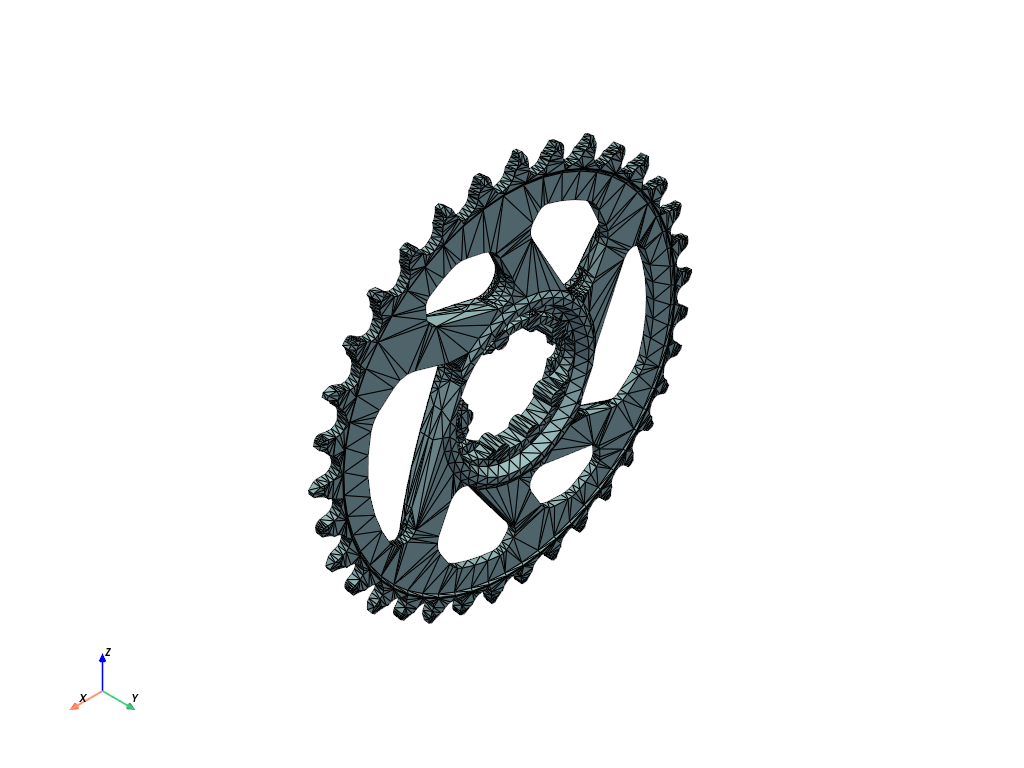

In [13]:
mesh_test = pv.read("files/mesh_test.stl")
mesh_test.plot(jupyter_backend='pythreejs',show_edges=True,background="white" )

In [14]:
print(type(mesh_test))
mesh_test

<class 'pyvista.core.pointset.PolyData'>


PolyData,Information
N Cells,21684
N Points,10832
N Strips,0
X Bounds,"-6.869e+00, 6.882e+00"
Y Bounds,"-5.961e-01, 3.500e-01"
Z Bounds,"-6.815e+00, 6.905e+00"
N Arrays,0
